In [1]:
# Importing modules
import pandas as pd
import nltk

#Importing the data set
rows = []
for fileid in nltk.corpus.movie_reviews.fileids():
    rows.append({"text": nltk.corpus.movie_reviews.raw(fileid)})
df = pd.DataFrame(rows)
print(len(df)) 
df.head()

2000


,text
0,"plot : two teen couples go to a church party ,..."
1,the happy bastard's quick movie review \ndamn ...
2,it is movies like these that make a jaded movi...
3,""" quest for camelot "" is warner bros . ' firs..."
4,synopsis : a mentally unstable man undergoing ...


In [2]:
#pre-processing: basic cleaning and removing stopwords(if needed)
# Load the regular expression library
import re
# Remove punctuation
df['text'] = \
df['text'].map(lambda x: re.sub('[,\.!?]', '', x))
#Convert the titles to lowercase
df['text'] = \
df['text'].map(lambda x: x.lower())
# Print out the first rows of papers
df['text'].head()

0    plot : two teen couples go to a church party  ...
1    the happy bastard's quick movie review \ndamn ...
2    it is movies like these that make a jaded movi...
3     " quest for camelot " is warner bros  ' first...
4    synopsis : a mentally unstable man undergoing ...
Name: text, dtype: object

In [4]:
# Function to tokenize text and remove punctuation using gensim's simple_preprocess
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(simple_preprocess(str(sentence), deacc=True))

# Convert the processed text column to a list of sentences
data = df['text'].values.tolist()

# Tokenize the sentences
data_words = list(sent_to_words(data))

# Print the first 30 tokens of the first sentence
print(data_words[:1][0][:30])

['plot', 'two', 'teen', 'couples', 'go', 'to', 'church', 'party', 'drink', 'and', 'then', 'drive', 'they', 'get', 'into', 'an', 'accident', 'one', 'of', 'the', 'guys', 'dies', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in']


In [5]:
import gensim.models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram and bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

['the', 'happy_bastard', 'quick', 'movie', 'review', 'damn', 'that', 'bug', 'it', 'got', 'head', 'start', 'in', 'this', 'movie', 'starring', 'jamie_lee_curtis', 'and', 'another', 'baldwin', 'brother', 'william', 'this', 'time', 'in', 'story', 'regarding', 'crew', 'of', 'tugboat', 'that', 'comes_across', 'deserted', 'russian', 'tech', 'ship', 'that', 'has', 'strangeness', 'to', 'it', 'when', 'they', 'kick', 'the', 'power', 'back', 'on', 'little', 'do', 'they', 'know', 'the', 'power', 'within', 'going', 'for', 'the', 'gore', 'and', 'bringing', 'on', 'few', 'action_sequences', 'here', 'and', 'there', 'virus', 'still', 'feels', 'very', 'empty', 'like', 'movie', 'going', 'for', 'all', 'flash', 'and', 'no', 'substance', 'we', 'don', 'know', 'why', 'the', 'crew', 'was', 'really', 'out', 'in', 'the', 'middle', 'of', 'nowhere', 'we', 'don', 'know', 'the', 'origin', 'of', 'what', 'took', 'over', 'the', 'ship', 'just', 'that', 'big', 'pink', 'flashy', 'thing', 'hit', 'the', 'mir', 'and', 'of', 'c

In [6]:
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words_en = stopwords.words('english')
stop_words_en.extend(['from', 'subject', 're', 'use'])

#some customizable stop words for movie review texts
stop_words_en.extend(['film', 'movie', 'character', 'scene', 'story', 'director', 'actor', 'plot'])
stop_words = stop_words_en

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prayashpathak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#LDA pre-processing
# Define functions for stopwords2 and lemmatization

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [8]:
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

data_words_trigrams = make_trigrams(data_words_bigrams)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

data_lemma = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Remove Stop Words
data_lemmatized = remove_stopwords(data_lemma)


print(data_lemmatized[:1][0][:30])

['teen', 'couple', 'go', 'drink', 'drive', 'get', 'accident', 'guy', 'die', 'girlfriend', 'continue', 'see', 'life', 'nightmare', 'deal', 'watch', 'find', 'critique', 'mind', 'fuck', 'teen', 'generation', 'touch', 'cool', 'idea', 'present', 'bad', 'package', 'make', 'review']


In [9]:
#write function for similarity of 2 responses
import math 
import string 
import sys 
import numpy as np

# counts frequency of each word 
# returns a dictionary which maps 
# the words to their frequency. 
def count_frequency(word_list): 
    D = {}
    for new_word in word_list: 
        D[new_word] = D.get(new_word, 0) + 1
    return D 

# returns dictionary of (word, frequency) 
# pairs from the previous dictionary. 
def word_frequencies_for_file(word_list): 
    return count_frequency(word_list)


# returns the dot product of two documents 
def dotProduct(D1, D2): 
    return sum(D1[key] * D2.get(key, 0) for key in D1)

# returns the angle in radians 
# between document vectors 
def vector_angle(D1, D2): 
    numerator = dotProduct(D1, D2) 
    denominator = math.sqrt(dotProduct(D1, D1) * dotProduct(D2, D2))
    return math.acos(numerator / denominator) if denominator != 0 else 0


def documentSimilarity2(filename_1, filename_2): 
    sorted_word_list_1 = word_frequencies_for_file(filename_1) 
    sorted_word_list_2 = word_frequencies_for_file(filename_2) 
    distance = vector_angle(sorted_word_list_1, sorted_word_list_2) 
    return np.rad2deg(distance)  # Convert from radians to degrees

def do_repeat(filename_1, filename_2): 
    similarity = documentSimilarity2(filename_1, filename_2) 
    return 1 if similarity <= 10 else 0


In [10]:
#function to check for blank responses

import numpy as np
import tqdm

# Initialize the text_blank column to 0
df['text_blank'] = 0

# Check for blank entries and update the 'answer_blank' column
pbar = tqdm.tqdm(total=len(data_lemmatized))
for i in range(len(data_lemmatized)):
    if not data_lemmatized[i]:  # Check if the list is empty
        df.loc[i, 'text_blank'] = 1  # Use .loc for assignment
    pbar.update(1)
pbar.close()

# Get the list of indices where the text is blank
i_list = df[df['text_blank'] == 1].index.tolist()

# Reverse the index list to ensure correct removal order
i_list.reverse()

# Create a copy of the lemmatized data
lem2 = data_lemmatized.copy()

# Remove blank elements from the lemmatized data using the reversed indices
for i in i_list:
    lem2.pop(i)

# Build a new DataFrame without the blanks
df_new = df[df['text_blank'] == 0].reset_index(drop=True)

# Replace the original DataFrame and lemmatized list
df_withblanks = df
df = df_new

data_lemmatized_withblanks = data_lemmatized
data_lemmatized = lem2

# Final check to ensure consistency
assert len(df) == len(data_lemmatized), "Mismatch between df and data_lemmatized lengths!"


100%|███████████████████████████████████| 2000/2000 [00:00<00:00, 393535.75it/s]


In [11]:
#function to check for repeated responses
import numpy as np
import tqdm
import random 
import math 

# Initialize the text_repeat column to 0
df['text_repeat'] = 0

# Progress bar to track the time taken for comparison
pbar = tqdm.tqdm(total=len(df) * (len(df) - 1) // 2)
for doc1 in range(len(df['text_repeat'])):
    for doc2 in range(doc1 + 1, len(df['text_repeat'])):
        if do_repeat(data_lemmatized[doc1], data_lemmatized[doc2]) == 1:
            df.loc[doc1, 'text_repeat'] = 1
            df.loc[doc2, 'text_repeat'] = 2
        pbar.update(1)
pbar.close()

# Collect indices of repeated documents
i_list_norep = df[df['text_repeat'] == 2].index.tolist()

# Reverse the list to remove items from the end first
i_list_norep.reverse()

# Copy the lemmatized data
lem2_norep = data_lemmatized.copy()

# Remove repeated documents from lemmatized data
for i in i_list_norep:
    lem2_norep.pop(i)

# Build a new DataFrame without the repeats
df_norep = df[df['text_repeat'] < 2].reset_index(drop=True)

# Replace the original variables
df_noblankswithreps = df
df = df_norep

data_lemmatized_noblankswithrep = data_lemmatized
data_lemmatized = lem2_norep

# Final consistency check to ensure that the number of documents matches the number of lemmatized text lists
assert len(df) == len(data_lemmatized), "Mismatch between df and data_lemmatized lengths!"


100%|███████████████████████████████| 1999000/1999000 [04:41<00:00, 7105.89it/s]


In [12]:
#final pre-processing output
print(len(df))
print(len(data_lemmatized))

1994
1994


In [13]:
#now create input for LDA model:dictionary and corpus
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:11])


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [14]:
# Build LDA model with arbitary hyperparameters and number of topics
import gensim.models
lda_model_0 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=6,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True,
                                       workers=4)


In [15]:
from pprint import pprint

# Print the Keyword in the topics
pprint(lda_model_0.print_topics())

[(0,
  '0.007*"make" + 0.007*"get" + 0.006*"time" + 0.005*"see" + 0.005*"go" + '
  '0.005*"even" + 0.005*"scream" + 0.005*"bad" + 0.005*"first" + '
  '0.004*"horror"'),
 (1,
  '0.018*"vampire" + 0.005*"blade" + 0.004*"sandler" + 0.003*"woman" + '
  '0.003*"play" + 0.003*"carpenter" + 0.002*"make" + 0.002*"writer" + '
  '0.002*"sex" + 0.002*"comedy"'),
 (2,
  '0.009*"get" + 0.008*"make" + 0.007*"go" + 0.007*"see" + 0.006*"good" + '
  '0.006*"well" + 0.006*"even" + 0.005*"time" + 0.005*"play" + 0.005*"know"'),
 (3,
  '0.008*"make" + 0.005*"good" + 0.005*"see" + 0.005*"time" + 0.005*"well" + '
  '0.005*"get" + 0.005*"life" + 0.004*"go" + 0.004*"man" + 0.004*"even"'),
 (4,
  '0.011*"get" + 0.010*"good" + 0.010*"make" + 0.008*"go" + 0.007*"see" + '
  '0.007*"bad" + 0.006*"time" + 0.006*"even" + 0.006*"play" + 0.005*"well"'),
 (5,
  '0.006*"bad" + 0.006*"make" + 0.005*"get" + 0.005*"go" + 0.005*"look" + '
  '0.005*"time" + 0.004*"see" + 0.004*"ape" + 0.004*"even" + 0.004*"play"')]


In [16]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_0, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.270433752420162


In [17]:
#refine the model parameters and choose the number of topic
# Let's choose the num of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True,
                                       alpha=0.61,
                                       eta=0.31,
                                       workers=3)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=1, limit=11, step=1)

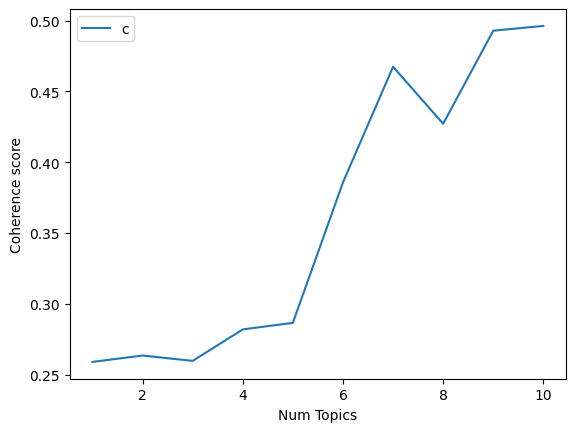

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# Show graph
limit=11; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.259
Num Topics = 2  has Coherence Value of 0.2636
Num Topics = 3  has Coherence Value of 0.2598
Num Topics = 4  has Coherence Value of 0.282
Num Topics = 5  has Coherence Value of 0.2866
Num Topics = 6  has Coherence Value of 0.3857
Num Topics = 7  has Coherence Value of 0.4674
Num Topics = 8  has Coherence Value of 0.4271
Num Topics = 9  has Coherence Value of 0.4928
Num Topics = 10  has Coherence Value of 0.4962


In [27]:
#Now choose hyper parameters:

# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True,
                                           workers=4)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [28]:
#Let’s call the function, and iterate it over the range of topics, alpha, and beta parameter values

import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('./lda_tuning_results_q1TEST6.csv', index=False)
    pbar.close()

100%|███████████████████████████████████████| 540/540 [2:11:40<00:00, 14.63s/it]


In [21]:
#final model estimation where we use the hyperparameters derived above
lda_model_final = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=7, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True,
                                       alpha=0.61,
                                       eta=0.31,
                                       workers=3)

In [22]:
from pprint import pprint

# Print the Keyword in the  topics
pprint(lda_model_final.print_topics())

[(0,
  '0.010*"scream" + 0.005*"series" + 0.005*"star_trek" + 0.004*"mulan" + '
  '0.003*"spawn" + 0.003*"bat" + 0.003*"file" + 0.003*"fan" + 0.002*"seagal" + '
  '0.002*"sequel"'),
 (1,
  '0.012*"vampire" + 0.005*"shrek" + 0.004*"blade" + 0.003*"grace" + '
  '0.003*"kiki" + 0.002*"sandler" + 0.002*"chocolat" + 0.002*"booker" + '
  '0.002*"donkey" + 0.002*"blake"'),
 (2,
  '0.010*"get" + 0.008*"see" + 0.008*"go" + 0.007*"make" + 0.006*"good" + '
  '0.006*"even" + 0.006*"well" + 0.006*"time" + 0.005*"bad" + 0.005*"know"'),
 (3,
  '0.009*"make" + 0.006*"good" + 0.006*"see" + 0.006*"get" + 0.006*"time" + '
  '0.005*"well" + 0.005*"go" + 0.004*"even" + 0.004*"play" + 0.004*"take"'),
 (4,
  '0.008*"get" + 0.007*"good" + 0.006*"go" + 0.005*"bad" + 0.005*"play" + '
  '0.005*"comedy" + 0.004*"make" + 0.004*"funny" + 0.004*"also" + '
  '0.004*"really"'),
 (5,
  '0.005*"ape" + 0.003*"dvd" + 0.003*"disc" + 0.002*"flynt" + 0.002*"argento" '
  '+ 0.002*"vs_larry_flynt" + 0.002*"fellini" + 0.002*"sp

In [23]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_final, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4488208257602772


In [24]:
#visualize the topics
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_final, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.235515  0.028219       1        1  70.364935
2     -0.202524 -0.007463       2        1  20.373286
4     -0.083960 -0.020047       3        1   4.721688
0      0.092383 -0.074172       4        1   1.597374
1      0.141251  0.099385       5        1   1.412154
5      0.142498 -0.013819       6        1   0.866811
6      0.145868 -0.012103       7        1   0.663753, topic_info=               Term         Freq        Total Category  logprob  loglift
72              get  3356.000000  3356.000000  Default  30.0000  30.0000
76             good  3147.000000  3147.000000  Default  29.0000  29.0000
75               go  2821.000000  2821.000000  Default  28.0000  28.0000
14              bad  1338.000000  1338.000000  Default  27.0000  27.0000
127            play  2166.000000  2166.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
1992       computer     7.331579   137.749691   Topic7  -6.1559   2.0818
10414  mercury_rise     2.737661     6.951445   Topic7  -7.1410   4.0832
9010         cusack     3.635015    27.835790   Topic7  -6.8575   2.9793
1507          irish     3.490309    34.115244   Topic7  -6.8981   2.7353
5750           disc     3.151707    21.037797   Topic7  -7.0002   3.1166

[467 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
672        1  0.832618        action
672        2  0.131519        action
672        3  0.035409        action
14395      1  0.032462  albert_brook
14395      2  0.941398  albert_brook
...      ...       ...           ...
178        4  0.001071         world
4146       1  0.034554       wrestle
4146       2  0.932947       wrestle
3315       2  0.924534      wrestler
19123      5  0.749814        zardoz

[876 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 1, 2, 6, 7])

In [26]:
def format_topics_sentences(ldamodel=lda_model_final, corpus=corpus):
    # Init output
    sent_topics_list = []

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution, and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_list.append([int(topic_num), round(prop_topic, 4), topic_keywords])
            else:
                break

    # Create a DataFrame from the list
    sent_topics_df = pd.DataFrame(sent_topics_list, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Add original text to the end of the output
    contents = pd.Series(df['text'].values)  # Ensure it is a Series
    sent_topics_df = pd.concat([sent_topics_df, contents.reset_index(drop=True)], axis=1)

    return sent_topics_df



In [27]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_final, corpus=corpus)

In [28]:
# Now we display the topic outpts generated above merging it with original dataset and addding some columns like
#dominant topic and topic contribution to get a better idea of the LDA topics
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# print the final table
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.6812,"make, good, see, get, time, well, go, even, pl...",plot : two teen couples go to a church party ...
1,1,3,0.8161,"make, good, see, get, time, well, go, even, pl...",the happy bastard's quick movie review \ndamn ...
2,2,3,0.7833,"make, good, see, get, time, well, go, even, pl...",it is movies like these that make a jaded movi...
3,3,2,0.9604,"get, see, go, make, good, even, well, time, ba...",""" quest for camelot "" is warner bros ' first..."
4,4,3,0.6496,"make, good, see, get, time, well, go, even, pl...",synopsis : a mentally unstable man undergoing ...
5,5,3,0.7285,"make, good, see, get, time, well, go, even, pl...",capsule : in 2176 on the planet mars police ta...
6,6,3,0.9792,"make, good, see, get, time, well, go, even, pl...","so ask yourself what "" 8mm "" ( "" eight millime..."
7,7,2,0.9804,"get, see, go, make, good, even, well, time, ba...",that's exactly how long the movie felt to me ...
8,8,3,0.5210,"make, good, see, get, time, well, go, even, pl...",call it a road trip for the walking wounded \...
9,9,2,0.9378,"get, see, go, make, good, even, well, time, ba...",plot : a young french boy sees his parents kil...


In [29]:
# top sentences under each topic so as to see how good the model works
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                            grp.sort_values(['Perc_Contribution'], ascending=[0]).head(5)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format the output table
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# print the final table
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0,0.3646,"scream, series, star_trek, mulan, spawn, bat, ...","susan granger's review of "" osmosis jones "" ( ..."
1,2,0.9879,"get, see, go, make, good, even, well, time, ba...",i've never written a review for a movie i have...
2,2,0.9869,"get, see, go, make, good, even, well, time, ba...",mike myers you certainly did throw us a fric...
3,2,0.9868,"get, see, go, make, good, even, well, time, ba...",when i first heard that disney's next animated...
4,2,0.9859,"get, see, go, make, good, even, well, time, ba...",ready to rumble is not a masterpiece in film ;...
